<a href="https://colab.research.google.com/github/RodrigoMachadodaSilva/Ci-ncia-de-Dados-Projeto-Recursos-Humanos/blob/main/Projeto_Departamento_de_Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Recursos Humanos

### Estudo de caso onde a classe a ser analizada, representa a possibilidade de o funcionário deixar a empresa.

Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Human_Resources.csv')

In [ ]:
dados.shape

(1470, 35)

In [ ]:
dados.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
dados.rename(columns={'Age':'Idade','Attrition':'Saiu','BusinessTravel':'Viagens_Trabalho','DailyRate':'Diaria',
                      'Department':'Departamento','DistanceFromHome':'Distancia_ate_Trabalho',
                      'Education':'Educaçao','EducationField':'Area_de_Formaçao',
                      'EmployeeCount':'Contagem_Empregado','EmployeeNumber':'Numero_do_Empregado',
                      'EnvironmentSatisfaction':'Nivel_de_Satisfaçao','Gender':'Genero',
                      'HourlyRate':'Horas_Trabalhadas','JobInvolvement':'Envolvimento','JobLevel':'Nivel_do_Cargo',
                      'JobRole':'Funçao','JobSatisfaction':'Satisfaçao_no_Trabalho',
                      'MaritalStatus':'Estado_Civil','MonthlyIncome':'Renda_Mensal','MonthlyRate':'Valor_Mensal',
                      'NumCompaniesWorked':'Empregos_Anteriores','Over18':'Maior_de_Idade',
                      'OverTime':'Horas_Extras','PercentSalaryHike':'Percentual_Aumento',
                      'PerformanceRating':'Avaliaçao_Desempenho','RelationshipSatisfaction':'Relacionamento',
                      'StandardHours':'Horario_Padrao','StockOptionLevel':'Bonificaçao_com_Açoes',
                      'TotalWorkingYears':'Tempo_de_Serviço','TrainingTimesLastYear':'Horas_Treinamento',
                      'WorkLifeBalance':'Relaçao_Trabalho/Vida','YearsAtCompany':'Tempo_na_Empresa',
                      'YearsInCurrentRole':'Tempo_na_Funçao','YearsSinceLastPromotion':'Ultima_Promoçao(anos)',
                      'YearsWithCurrManager':'Tempo_Atual_Gerente'},inplace = True)

In [ ]:
dados.head()

,Idade,Saiu,Viagens_Trabalho,Diaria,Departamento,Distancia_ate_Trabalho,Educaçao,Area_de_Formaçao,Contagem_Empregado,Numero_do_Empregado,Nivel_de_Satisfaçao,Genero,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Funçao,Satisfaçao_no_Trabalho,Estado_Civil,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Maior_de_Idade,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Horario_Padrao,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Idade                   1470 non-null   int64 
 1   Saiu                    1470 non-null   object
 2   Viagens_Trabalho        1470 non-null   object
 3   Diaria                  1470 non-null   int64 
 4   Departamento            1470 non-null   object
 5   Distancia_ate_Trabalho  1470 non-null   int64 
 6   Educaçao                1470 non-null   int64 
 7   Area_de_Formaçao        1470 non-null   object
 8   Contagem_Empregado      1470 non-null   int64 
 9   Numero_do_Empregado     1470 non-null   int64 
 10  Nivel_de_Satisfaçao     1470 non-null   int64 
 11  Genero                  1470 non-null   object
 12  Horas_Trabalhadas       1470 non-null   int64 
 13  Envolvimento            1470 non-null   int64 
 14  Nivel_do_Cargo          1470 non-null   int64 
 15  Funç

In [ ]:
dados.describe()

,Idade,Diaria,Distancia_ate_Trabalho,Educaçao,Contagem_Empregado,Numero_do_Empregado,Nivel_de_Satisfaçao,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Satisfaçao_no_Trabalho,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Horario_Padrao,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Visualização dos dados

In [ ]:
dados['Saiu'] = dados['Saiu'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
dados['Horas_Extras'] = dados['Horas_Extras'].apply(lambda x: 1 if x == 'Yes' else 0)
dados['Maior_de_Idade'] = dados['Maior_de_Idade'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
dados.head()

,Idade,Saiu,Viagens_Trabalho,Diaria,Departamento,Distancia_ate_Trabalho,Educaçao,Area_de_Formaçao,Contagem_Empregado,Numero_do_Empregado,Nivel_de_Satisfaçao,Genero,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Funçao,Satisfaçao_no_Trabalho,Estado_Civil,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Maior_de_Idade,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Horario_Padrao,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


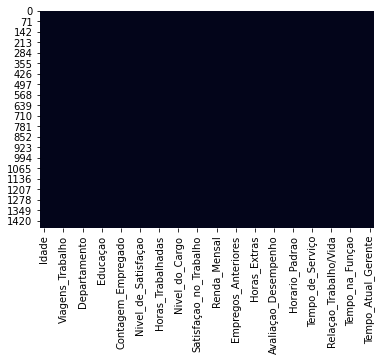

In [ ]:
sns.heatmap(dados.isnull(), cbar = False);

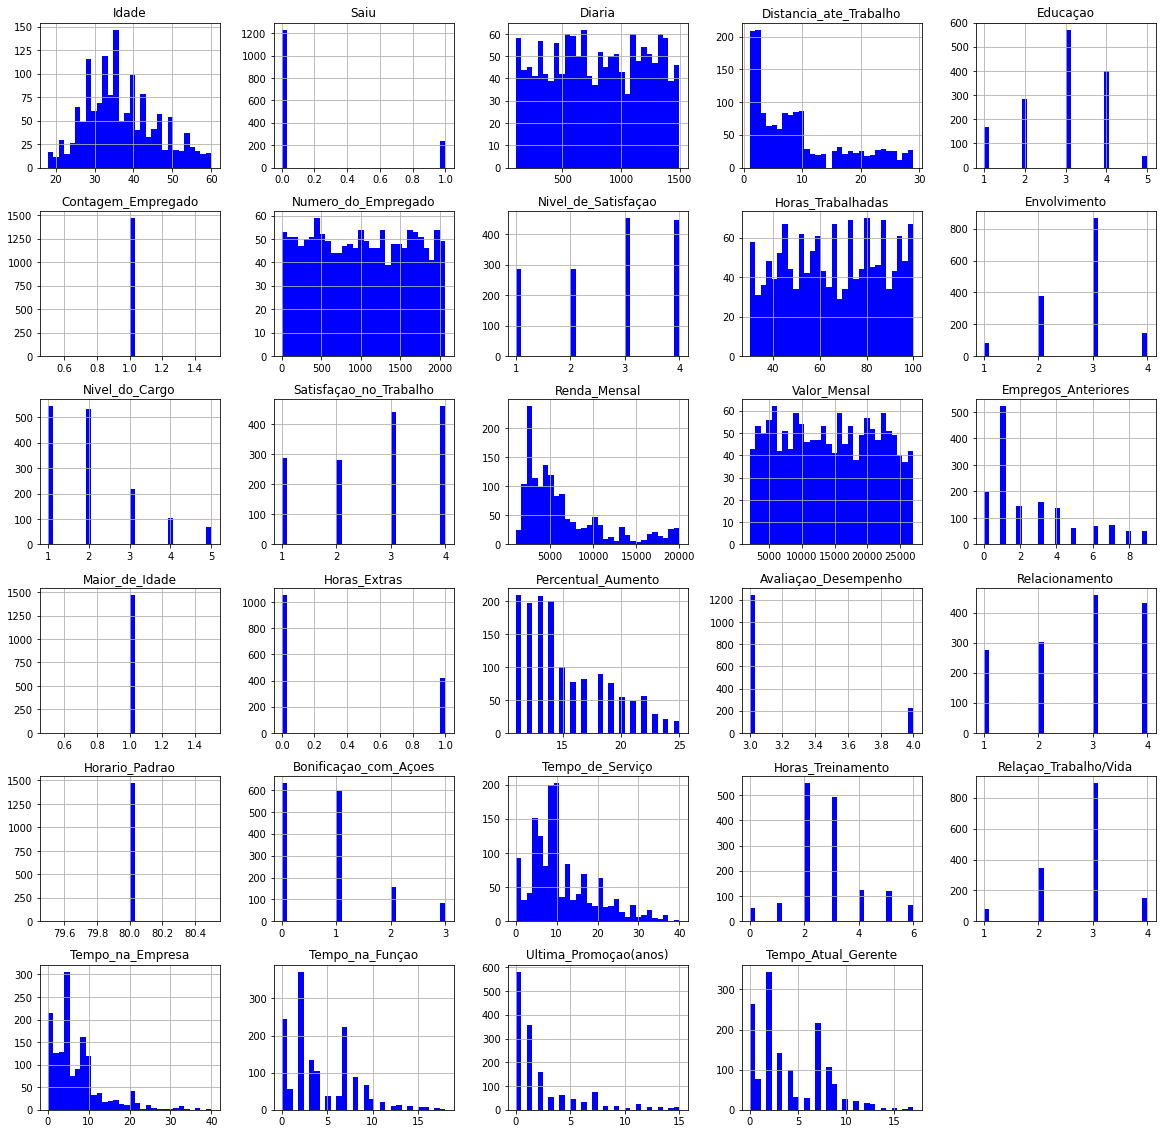

In [ ]:
dados.hist(bins = 30, figsize=(20,20), color = 'b');

In [ ]:
dados.drop(['Contagem_Empregado','Horario_Padrao', 'Maior_de_Idade','Numero_do_Empregado'], axis = 1, inplace=True)

In [ ]:
dados.head()

,Idade,Saiu,Viagens_Trabalho,Diaria,Departamento,Distancia_ate_Trabalho,Educaçao,Area_de_Formaçao,Nivel_de_Satisfaçao,Genero,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Funçao,Satisfaçao_no_Trabalho,Estado_Civil,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
dados_demitidos = dados[dados['Saiu'] == 1]
dados_empregados = dados[dados['Saiu'] == 0]

In [ ]:
print('Total = ', len(dados))
print('Número de funcionários que saíram da empresa = ', len(dados_demitidos))
print('Porcentagem de funcionários que saíram da empresa = ', (len(dados_demitidos) / len(dados)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(dados_empregados))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(dados_empregados) / len(dados)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [ ]:
dados_demitidos.describe()

,Idade,Saiu,Diaria,Distancia_ate_Trabalho,Educaçao,Nivel_de_Satisfaçao,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Satisfaçao_no_Trabalho,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
dados_empregados.describe()

,Idade,Saiu,Diaria,Distancia_ate_Trabalho,Educaçao,Nivel_de_Satisfaçao,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Satisfaçao_no_Trabalho,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


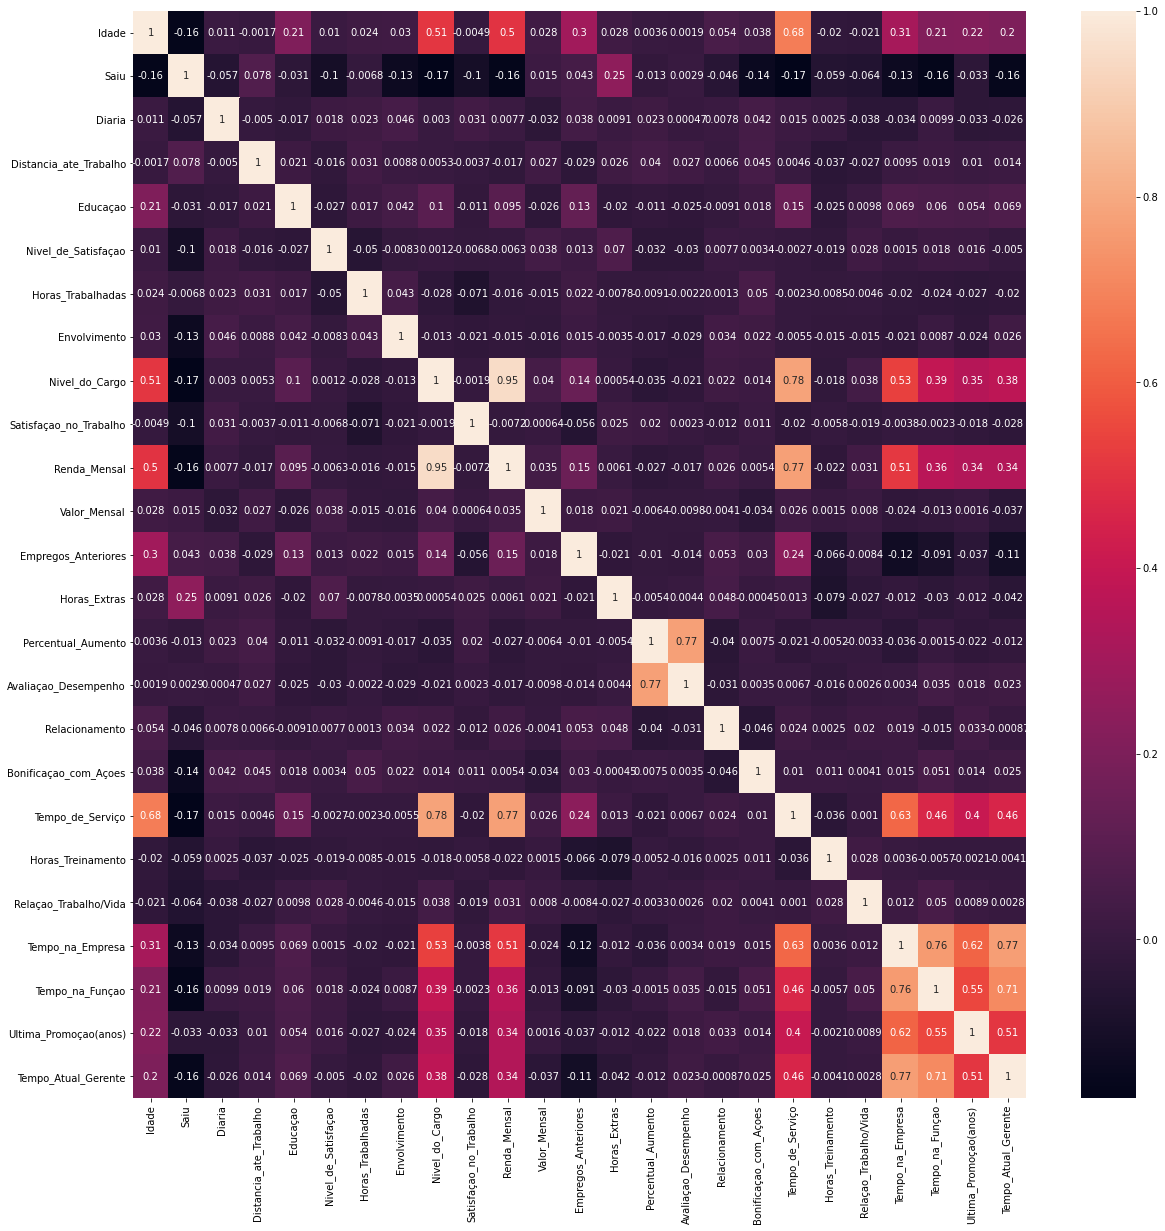

In [ ]:
correlacao = dados.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacao, annot=True);

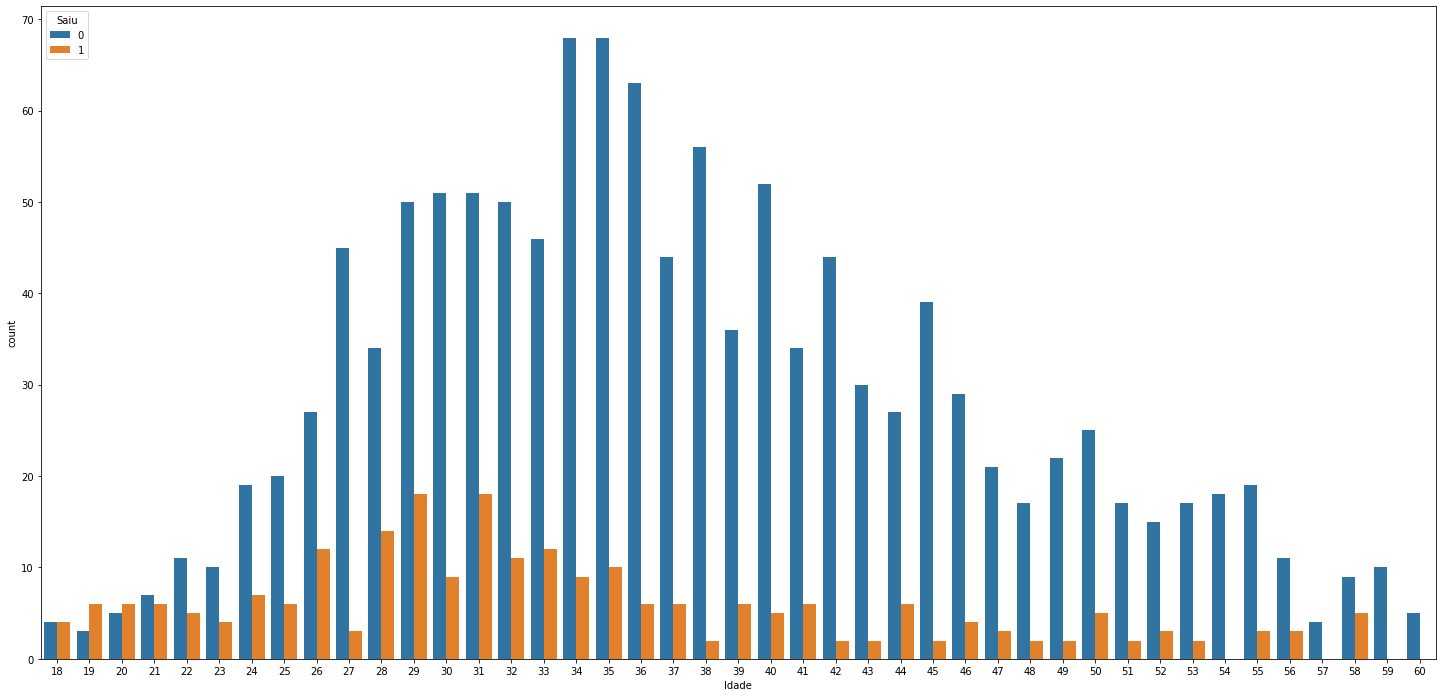

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Idade', hue = 'Saiu', data=dados);

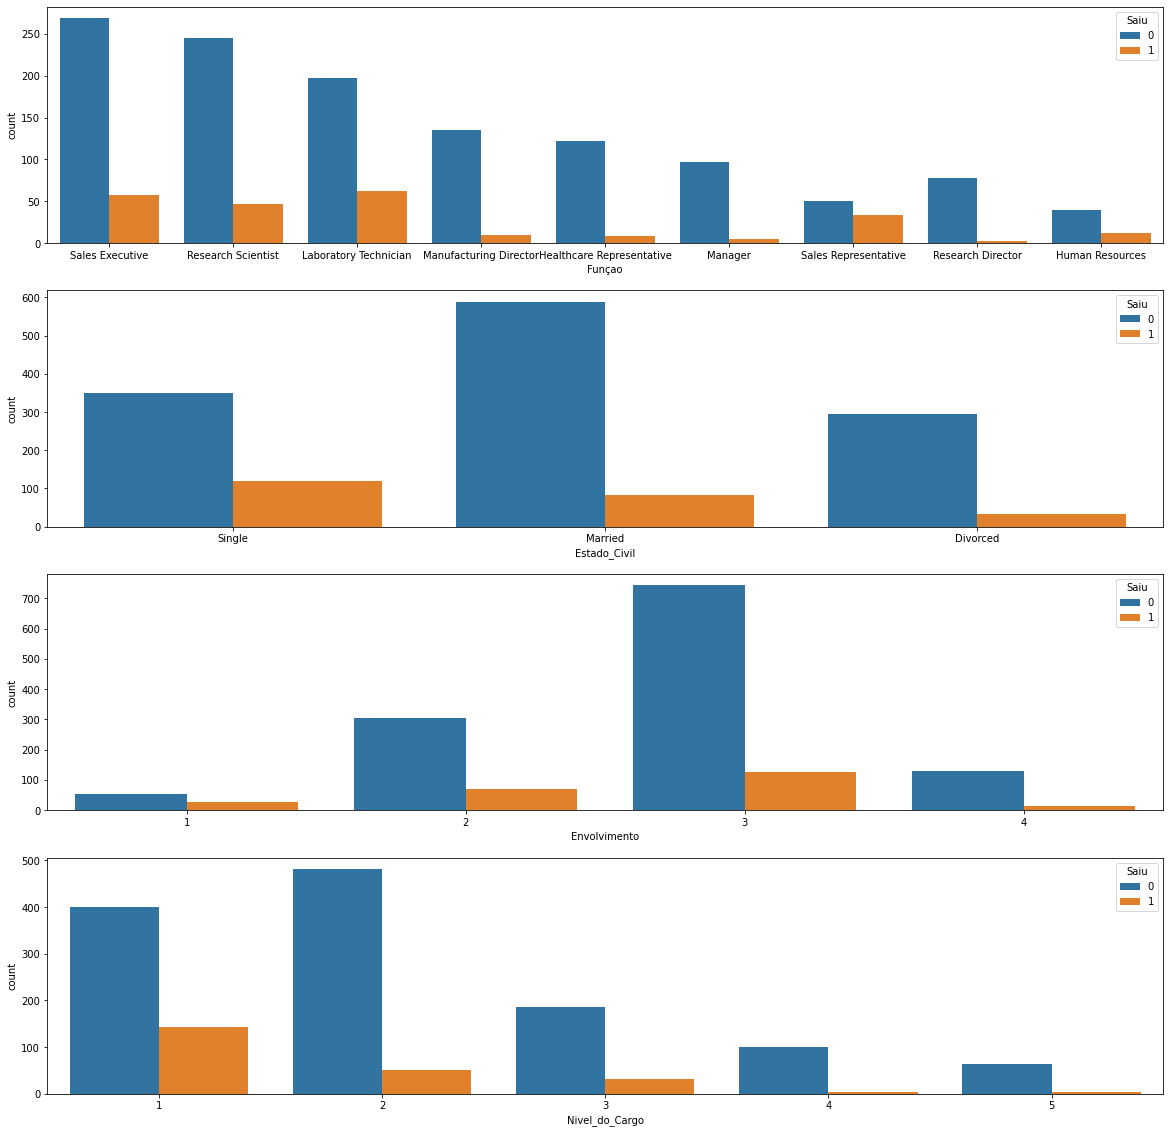

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Funçao', hue = 'Saiu', data = dados)
plt.subplot(412)
sns.countplot(x = 'Estado_Civil', hue = 'Saiu', data = dados)
plt.subplot(413)
sns.countplot(x = 'Envolvimento', hue = 'Saiu', data = dados)
plt.subplot(414)
sns.countplot(x = 'Nivel_do_Cargo', hue = 'Saiu', data = dados)

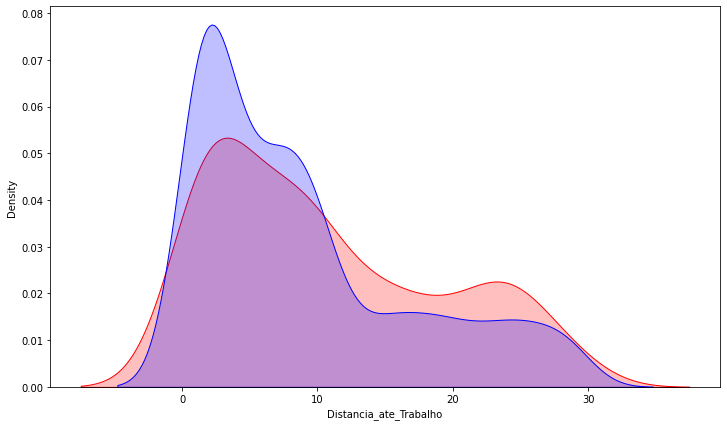

In [ ]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(dados_demitidos['Distancia_ate_Trabalho'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(dados_empregados['Distancia_ate_Trabalho'], label = 'Funcionários que ficaram', shade = True, color = 'b');

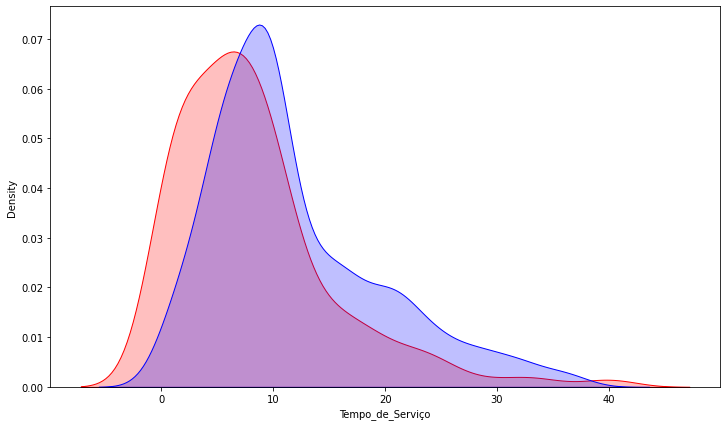

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(dados_demitidos['Tempo_de_Serviço'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(dados_empregados['Tempo_de_Serviço'], label = 'Funcionários que ficaram', shade = True, color = 'b');

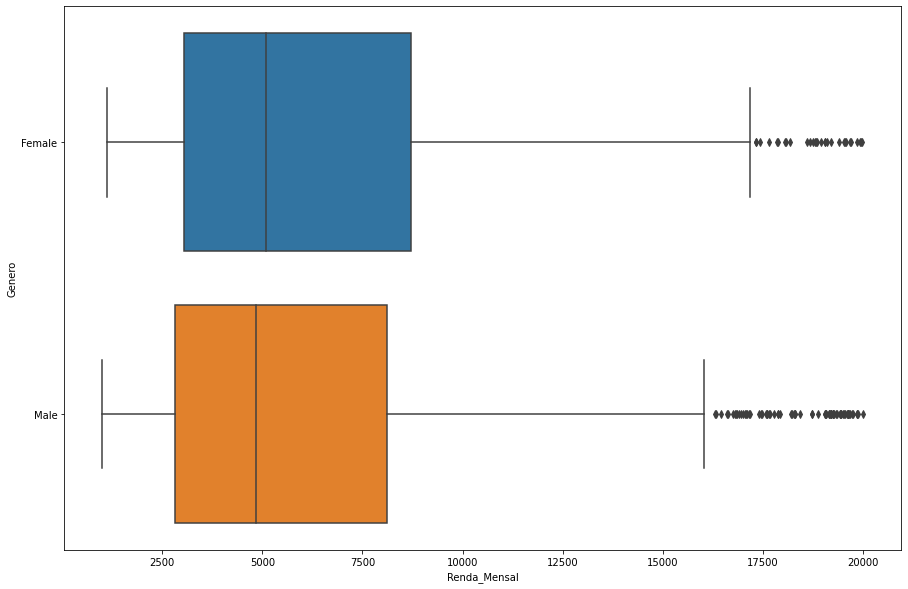

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Renda_Mensal', y = 'Genero', data = dados);

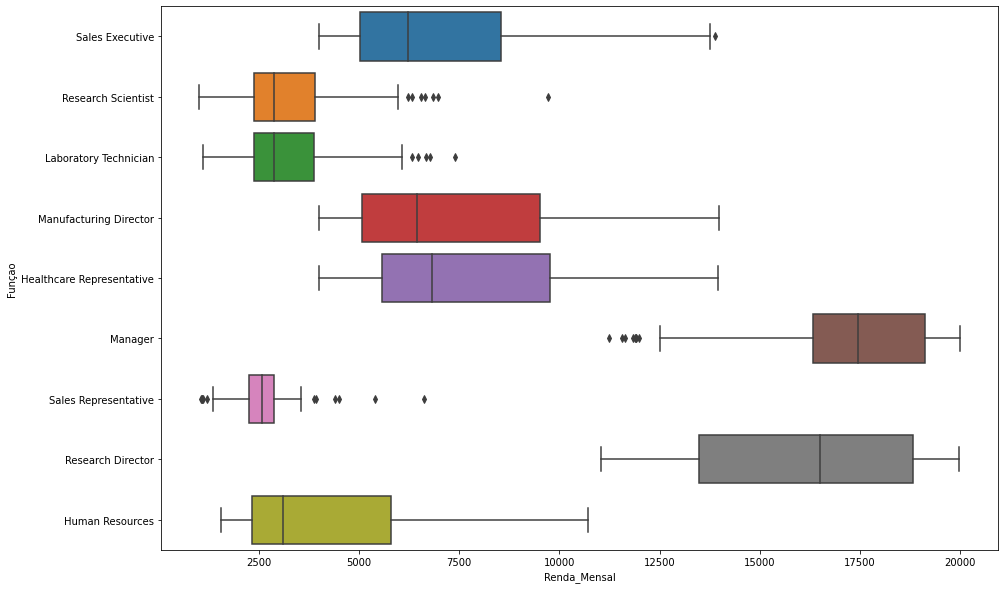

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Renda_Mensal', y = 'Funçao', data = dados);

## Pré-processamento e bases de treinamento/teste

In [ ]:
dados.head()

,Idade,Saiu,Viagens_Trabalho,Diaria,Departamento,Distancia_ate_Trabalho,Educaçao,Area_de_Formaçao,Nivel_de_Satisfaçao,Genero,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Funçao,Satisfaçao_no_Trabalho,Estado_Civil,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
X_cat = dados[['Viagens_Trabalho', 'Departamento', 'Area_de_Formaçao', 'Genero', 'Funçao', 'Estado_Civil']]
X_cat

,Viagens_Trabalho,Departamento,Area_de_Formaçao,Genero,Funçao,Estado_Civil
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
dados['Viagens_Trabalho'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_numericos = dados[['Idade','Diaria', 'Distancia_ate_Trabalho',	'Educaçao', 'Nivel_de_Satisfaçao', 'Horas_Trabalhadas', 'Envolvimento',	'Nivel_do_Cargo',	'Satisfaçao_no_Trabalho',	'Renda_Mensal',	'Valor_Mensal',	'Empregos_Anteriores', 'Horas_Extras',	'Percentual_Aumento', 'Avaliaçao_Desempenho',	'Relacionamento',	'Bonificaçao_com_Açoes',	'Tempo_de_Serviço'	,'Horas_Treinamento'	, 'Relaçao_Trabalho/Vida',	'Tempo_na_Empresa'	,'Tempo_na_Funçao', 'Ultima_Promoçao(anos)',	'Tempo_Atual_Gerente' ]]
X_numericos

,Idade,Diaria,Distancia_ate_Trabalho,Educaçao,Nivel_de_Satisfaçao,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Satisfaçao_no_Trabalho,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all = pd.concat([X_cat, X_numericos], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Idade,Diaria,Distancia_ate_Trabalho,Educaçao,Nivel_de_Satisfaçao,Horas_Trabalhadas,Envolvimento,Nivel_do_Cargo,Satisfaçao_no_Trabalho,Renda_Mensal,Valor_Mensal,Empregos_Anteriores,Horas_Extras,Percentual_Aumento,Avaliaçao_Desempenho,Relacionamento,Bonificaçao_com_Açoes,Tempo_de_Serviço,Horas_Treinamento,Relaçao_Trabalho/Vida,Tempo_na_Empresa,Tempo_na_Funçao,Ultima_Promoçao(anos),Tempo_Atual_Gerente
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
y = dados['Saiu']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Saiu, Length: 1470, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )

In [ ]:
X_train.shape, y_train

((1102, 50), 464     0
 512     0
 480     1
 680     0
 1023    0
        ..
 715     0
 905     0
 1096    0
 235     0
 1061    0
 Name: Saiu, Length: 1102, dtype: int64)

In [ ]:
X_test.shape, y_test

((368, 50), 1291    1
 1153    1
 720     1
 763     0
 976     0
        ..
 78      0
 1092    0
 399     0
 831     1
 35      0
 Name: Saiu, Length: 368, dtype: int64)

## Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros ={'penalty':['l1', 'l2', 'elasticnet'],'dual':[True,False],'tol':[0.001,0.003,0.005],
             'C':[0.5,1.0,2.0,],'fit_intercept':[True,False],'intercept_scaling':[0.3,0.7,1.0],
             'class_weight' : [dict,'balanced',None],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [ ]:
modelo_regressao_logistica = GridSearchCV(estimator=LogisticRegression(),param_grid=parametros, cv = 10,n_jobs=-1)

In [ ]:
modelo_regressao_logistica.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0],
                         'class_weight': [<class 'dict'>, 'balanced', None],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'intercept_scaling': [0.3, 0.7, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                      

In [ ]:
y_pred = modelo_regressao_logistica.predict(X_test)

In [ ]:
melhores_parametros = modelo_regressao_logistica.best_params_

In [ ]:
print(melhores_parametros)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 0.3, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.005}


In [ ]:
melhor_resultado = modelo_regressao_logistica.best_score_

In [ ]:
print(melhor_resultado)

0.8883947583947585


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix

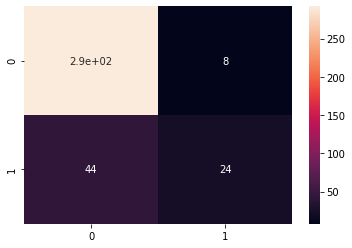

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

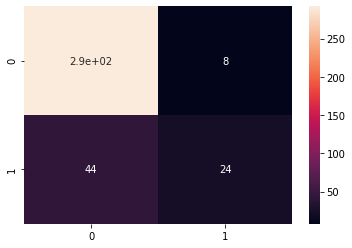

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.8586956521739131

In [ ]:
recall_score(y_test, y_pred)

0.35294117647058826

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.6991194968553459

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       300
           1       0.75      0.35      0.48        68

    accuracy                           0.86       368
   macro avg       0.81      0.66      0.70       368
weighted avg       0.85      0.86      0.84       368



# LGBMC

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
modelo_lgbmc = LGBMClassifier()

In [ ]:
modelo_lgbmc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = modelo_lgbmc.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.8369565217391305

In [ ]:
precision_score(y_pred,y_test)


0.2647058823529412

In [ ]:
recall_score(y_pred,y_test)

0.6428571428571429

In [ ]:
confusion_matrix(y_pred,y_test)

array([[290,  50],
       [ 10,  18]])

In [ ]:
parametros_lgbmc = {'boosting_type':['string' , 'opcional', 'gbdt' ],'learning_rate':[1e-3, 1e-1,'log-uniform'],'num_leaves':(2,128),
                    'min_child_samples':(1,100,2),'subsample':(0.05,1.0),'coldsample':(0.1,1.0)}

In [ ]:
modelo_lgbmc_tunning =  GridSearchCV(estimator=LGBMClassifier(),param_grid=parametros_lgbmc , cv = 10,n_jobs=-1)

In [ ]:
modelo_lgbmc_tunning.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['string', 'opcional', 'gbdt'],
                     

In [ ]:
recall_score(y_pred,y_test)

0.6428571428571429

In [ ]:
precision_score(y_pred,y_test)

0.2647058823529412

In [ ]:
 melhores_parametros = modelo_lgbmc_tunning.best_params_

In [ ]:
melhores_parametros

{'boosting_type': 'gbdt',
 'coldsample': 0.1,
 'learning_rate': 0.1,
 'min_child_samples': 100,
 'num_leaves': 128,
 'subsample': 0.05}

In [ ]:
melhor_resultado = modelo_lgbmc_tunning.best_score_
melhor_resultado

0.8738493038493038

In [ ]:
y_pred = modelo_lgbmc_tunning.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[293,   7],
       [ 48,  20]])

In [ ]:
cm = confusion_matrix

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_test, y_pred)

0.8260869565217391

In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[295,  59],
       [  5,   9]])

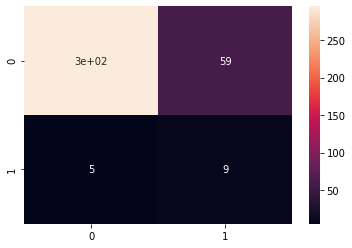

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
precision_score(y_test, y_pred)

0.6428571428571429

In [ ]:
recall_score(y_test, y_pred)

0.1323529411764706

In [ ]:
f1_score(y_test, y_pred)

0.21951219512195122

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       300
           1       0.64      0.13      0.22        68

    accuracy                           0.83       368
   macro avg       0.74      0.56      0.56       368
weighted avg       0.80      0.83      0.78       368



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB( )
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = naive_bayes.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[200,  26],
       [100,  42]])

In [ ]:
accuracy_score(y_test,y_pred)

0.657608695652174

In [ ]:
precision_score(y_test, y_pred)

0.29577464788732394

In [ ]:
recall_score(y_test, y_pred)

0.6176470588235294

In [ ]:
f1_score(y_test, y_pred)

0.39999999999999997

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       300
           1       0.30      0.62      0.40        68

    accuracy                           0.66       368
   macro avg       0.59      0.64      0.58       368
weighted avg       0.78      0.66      0.69       368



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', random_state=1 )

In [ ]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[293,  47],
       [  7,  21]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8532608695652174

In [ ]:
precision_score(y_test, y_pred)

0.75

In [ ]:
recall_score(y_test, y_pred)

0.3088235294117647

In [ ]:
f1_score(y_test, y_pred)

0.4375

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       300
           1       0.75      0.31      0.44        68

    accuracy                           0.85       368
   macro avg       0.81      0.64      0.68       368
weighted avg       0.84      0.85      0.83       368



## Redes neurais artificiais

- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [ ]:
import tensorflow as tf

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
(50 + 1) / 2

25.5

In [ ]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.8421
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8466
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8466
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8485
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8584
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8702
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8784
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8802
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8875
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8929
Epoch 11/

In [ ]:
y_pred = rede_neural.predict(X_test)
y_pred

array([[4.34490036e-13],
       [1.00000000e+00],
       [4.51712513e-05],
       [2.65070200e-02],
       [1.42037868e-04],
       [2.55226951e-06],
       [1.61947310e-02],
       [9.55461383e-01],
       [4.82465730e-08],
       [1.56682251e-10],
       [2.33902342e-11],
       [1.62845761e-01],
       [1.00000000e+00],
       [5.57014118e-06],
       [5.59833944e-01],
       [3.03700783e-14],
       [3.30162031e-09],
       [9.99994278e-01],
       [1.00000000e+00],
       [8.18828241e-13],
       [2.89171934e-03],
       [2.65818562e-06],
       [1.99412098e-10],
       [9.23571051e-08],
       [1.37845427e-06],
       [9.74074304e-01],
       [9.80890751e-01],
       [5.62782922e-08],
       [2.22641432e-07],
       [1.73646718e-01],
       [3.01726502e-08],
       [4.61700857e-02],
       [4.70220176e-15],
       [5.04730409e-08],
       [1.52289867e-04],
       [5.65314490e-15],
       [2.53430610e-12],
       [4.01938252e-08],
       [7.50714302e-01],
       [1.61905589e-09],


In [ ]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[264,  36],
       [ 41,  27]])

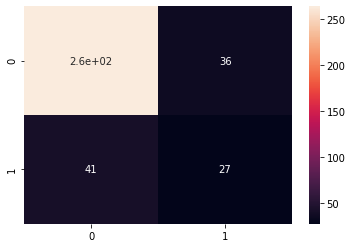

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       300
           1       0.43      0.40      0.41        68

    accuracy                           0.79       368
   macro avg       0.65      0.64      0.64       368
weighted avg       0.78      0.79      0.79       368



## Salvar o classificador

In [ ]:
import pickle

In [ ]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, modelo_regressao_logistica], f)

In [ ]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model_regressao_logistica = pickle.load(f)